In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split

In [2]:
# Load and review data
data = pd.read_csv("ratings_Electronics.csv")
data.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [3]:
# Renaming columns
data.rename(columns={'AKM1MP6P0OYPR':'user_id','0132793040':'product_id','5.0':'rating','1365811200':'timestamp'},inplace=True)
data.head()

,user_id,product_id,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [4]:
# Dropping timestamp column as it has no significant role in this dataset.
data= data.drop(['timestamp'], axis=1)
data.tail()

,user_id,product_id,rating
7824476,A2YZI3C9MOHC0L,BT008UKTMW,5.0
7824477,A322MDK0M89RHN,BT008UKTMW,5.0
7824478,A1MH90R0ADMIK0,BT008UKTMW,4.0
7824479,A10M2KEFPEQDHN,BT008UKTMW,4.0
7824480,A2G81TMIOIDEQQ,BT008V9J9U,5.0


In [5]:
data.shape

(7824481, 3)

In [6]:
#checking for null values in the dataset
data.isnull().sum().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 3 columns):
user_id       object
product_id    object
rating        float64
dtypes: float64(1), object(2)
memory usage: 119.4+ MB


In [8]:
data.dtypes

user_id        object
product_id     object
rating        float64
dtype: object

In [9]:
# Five point Summary of 'rating' variable
data['rating'].describe().transpose()

count    7.824481e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [10]:
# find minimum and maximum ratings
print('The minimum rating is: %d' %(data['rating'].min()))
print('The maximum rating is: %d' %(data['rating'].max()))

The minimum rating is: 1
The maximum rating is: 5


In [11]:
# Top 10 users based on rating
most_rated = data.groupby('user_id').size().sort_values(ascending=False)[:10]
most_rated

user_id
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
dtype: int64

In [12]:
# Take subset of dataset to make it less dense.
counts = data['user_id'].value_counts()
data_final = data[data['user_id'].isin(counts[counts >= 50].index)]
data_final.shape

(125871, 3)

In [13]:
print('Number of users who have rated 50 or more items =', len(data_final))
print('Number of unique USERS in final data = ', data_final['user_id'].nunique())
print('Number of unique ITEMS in final data = ', data_final['product_id'].nunique())

Number of users who have rated 50 or more items = 125871
Number of unique USERS in final data =  1540
Number of unique ITEMS in final data =  48190


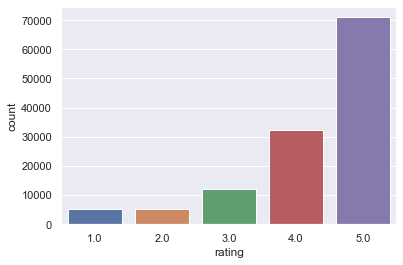

In [14]:
# Check the distribution of ratings 
sns.countplot(data_final['rating'])

In [ ]:
# Most of the products have high rating i.e 5, only few products have less rating.

In [15]:
# Popularity based recommendation

data_final.groupby('product_id')['rating'].mean().head()

product_id
0594451647    5.000000
0594481813    3.000000
0970407998    2.500000
0972683275    4.750000
1400501466    3.333333
Name: rating, dtype: float64

In [16]:
data_final.groupby('product_id')['rating'].mean().sort_values(ascending=False).head()  

product_id
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
Name: rating, dtype: float64

In [17]:
data_final.groupby('product_id')['rating'].count().sort_values(ascending=False).head()  

product_id
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
Name: rating, dtype: int64

In [18]:
ratings_mean_count = pd.DataFrame(data_final.groupby('product_id')['rating'].mean()) 

In [19]:
ratings_mean_count['rating_counts'] = pd.DataFrame(data_final.groupby('product_id')['rating'].count())  

In [20]:
ratings_mean_count.head(10)

,rating,rating_counts
product_id,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6
1400501520,5.000000,1
1400501776,4.500000,2
1400532620,3.000000,2
1400532655,3.833333,6


In [21]:
#Split the data randomnly into test and train datasets
#Split the training and test data in the ratio 70:30
#Subset of data_final is due to memory issue.
new_df = data_final.head(1000)

train_data, test_data = train_test_split(new_df, test_size = 0.3, random_state=0)
train_data.head()

,user_id,product_id,rating
9775,A2R6RA8FRBS608,B00000J1EP,4.0
7207,A1KY5G5FP31F2F,9989360391,5.0
30835,A12LH2100CKQO,B00002EIYA,5.0
27841,A1ZM846Y7AUYD,B00001WRSJ,5.0
29619,AKT8TGIT6VVZ5,B000021YU8,5.0


In [22]:
new_df.shape

(1000, 3)

In [23]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train_data.groupby('product_id').agg({'user_id': 'count'}).reset_index()
train_data_grouped.rename(columns = {'user_id': 'score'},inplace=True)
train_data_grouped.head()

,product_id,score
0,0594451647,1
1,0970407998,1
2,0972683275,3
3,1400501466,4
4,1400501776,2


In [24]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'product_id'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations 

,product_id,score,Rank
279,B00004SB92,15,1.0
152,B00001P4ZH,14,2.0
171,B00001WRSJ,13,3.0
277,B00004SABB,11,4.0
351,B00004THCZ,10,5.0


In [25]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['user_id'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [26]:
find_recom = [10,50,150]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the userId: 10

     user_id  product_id  score  Rank
279       10  B00004SB92     15   1.0
152       10  B00001P4ZH     14   2.0
171       10  B00001WRSJ     13   3.0
277       10  B00004SABB     11   4.0
351       10  B00004THCZ     10   5.0


Here is the recommendation for the userId: 50

     user_id  product_id  score  Rank
279       50  B00004SB92     15   1.0
152       50  B00001P4ZH     14   2.0
171       50  B00001WRSJ     13   3.0
277       50  B00004SABB     11   4.0
351       50  B00004THCZ     10   5.0


Here is the recommendation for the userId: 150

     user_id  product_id  score  Rank
279      150  B00004SB92     15   1.0
152      150  B00001P4ZH     14   2.0
171      150  B00001WRSJ     13   3.0
277      150  B00004SABB     11   4.0
351      150  B00004THCZ     10   5.0




C:\Users\Kranthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
#since this is a popularity-based recommender model, recommendations remain the same for all users

#We predict the products based on the popularity. It is not personalized to particular user.

In [28]:
# Collaborative filtering

df_CF = pd.concat([train_data, test_data]).reset_index()
df_CF.head()

,index,user_id,product_id,rating
0,9775,A2R6RA8FRBS608,B00000J1EP,4.0
1,7207,A1KY5G5FP31F2F,9989360391,5.0
2,30835,A12LH2100CKQO,B00002EIYA,5.0
3,27841,A1ZM846Y7AUYD,B00001WRSJ,5.0
4,29619,AKT8TGIT6VVZ5,B000021YU8,5.0


In [29]:
#User-based Collaborative Filtering
# Matrix with row per 'user' and column per 'item' 

pivot_df = df_CF.pivot(index = 'user_id', columns ='product_id', values = 'rating').fillna(0)
pivot_df.shape
pivot_df.head()

product_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00004VW2A,B00004VWM3,B00004VX15,B00004VX3T,B00004VXN2,B00004W1TW,B00004W3YK,B00004W3YX,B00004W3ZQ,B00004W62H
user_id,,,,,,,,,,,,,,,,,,,,,
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10PEXB6XAQ5XF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10X9ME6R66JDX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10Y058K7B96C6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
pivot_df.tail()

product_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00004VW2A,B00004VWM3,B00004VX15,B00004VX3T,B00004VXN2,B00004W1TW,B00004W3YK,B00004W3YX,B00004W3ZQ,B00004W62H
user_id,,,,,,,,,,,,,,,,,,,,,
AZAC8O310IK4E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZBXKUH4AIW3X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZCE11PSTCH1L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZMY6E8B52L2T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZOK5STV85FBJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


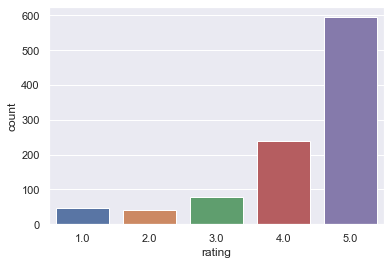

In [31]:
# Check the distribution of ratings 
sns.countplot(new_df['rating'])

In [32]:
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

product_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00004VWM3,B00004VX15,B00004VX3T,B00004VXN2,B00004W1TW,B00004W3YK,B00004W3YX,B00004W3ZQ,B00004W62H,user_index
user_id,,,,,,,,,,,,,,,,,,,,,
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A10PEXB6XAQ5XF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A10X9ME6R66JDX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A10Y058K7B96C6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [33]:
pivot_df.set_index(['user_index'], inplace=True)

# Actual ratings given by users
pivot_df.head()

product_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00004VW2A,B00004VWM3,B00004VX15,B00004VX3T,B00004VXN2,B00004W1TW,B00004W3YK,B00004W3YX,B00004W3ZQ,B00004W62H
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# SVD

from scipy.sparse.linalg import svds
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 10)
# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [35]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

product_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00004VW2A,B00004VWM3,B00004VX15,B00004VX3T,B00004VXN2,B00004W1TW,B00004W3YK,B00004W3YX,B00004W3ZQ,B00004W62H
0,-1.534099e-05,1.211890e-18,-1.008414e-04,7.368154e-04,7.992387e-05,1.507302e-05,1.579774e-05,-1.923630e-19,1.325235e-03,1.209309e-05,...,3.706300e-05,-1.065729e-03,-4.293222e-04,-2.916230e-03,-1.184611e-03,1.003573e-04,1.579548e-03,-3.081254e-03,-1.648263e-18,4.795313e-05
1,-1.285322e-03,1.428626e-18,-8.163776e-04,2.313563e-03,4.640088e-03,9.792247e-04,1.025152e-03,3.727277e-19,9.486696e-03,7.855776e-04,...,2.657015e-03,-1.844148e-02,-4.055664e-02,2.222851e-02,5.884479e-04,2.563408e-02,8.613131e-02,-1.441437e-02,3.339368e-18,1.153781e-02
2,1.474954e-18,2.143067e-32,8.468983e-20,4.356415e-18,-2.725711e-18,-6.843817e-19,-7.193694e-19,-1.310240e-33,8.875257e-18,-5.491751e-19,...,-1.310484e-18,3.737233e-17,7.088674e-17,6.890155e-18,-1.413548e-18,-7.340829e-18,-2.886561e-17,1.984436e-17,-9.869819e-33,-3.178303e-18
3,2.775325e-18,2.380264e-32,-4.288457e-20,-1.702925e-18,-6.410950e-18,-1.212770e-18,-1.277240e-18,3.414436e-33,-5.702021e-19,-9.732895e-19,...,-1.034117e-18,1.569582e-17,1.358999e-16,1.099610e-17,1.242660e-17,9.912777e-18,-5.318262e-17,-1.555482e-17,5.588005e-32,4.624476e-18
4,-1.248462e-19,-3.498857e-34,-2.406273e-19,1.845322e-19,6.508185e-19,8.243209e-20,8.656194e-20,-7.454209e-34,-1.217364e-19,6.614288e-20,...,5.468775e-20,-9.419044e-18,-3.560316e-18,-1.112292e-17,2.997399e-20,-4.746933e-19,2.310248e-18,-3.023752e-18,-1.041996e-32,-2.127105e-19


In [36]:
# Recommend the items with the highest predicted ratings

def recommend_items(user_id, pivot_df, preds_df, num_recommendations):
      
    user_idx = user_id-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(user_id))
    print(temp.head(num_recommendations))

In [37]:
#Enter 'user_id' and 'num_recommendations' for the user #
user_id = 10
num_recommendations = 5
recommend_items(user_id, pivot_df, preds_df, num_recommendations)

C:\Users\Kranthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]



Below are the recommended items for user(user_id = 10):

                   user_ratings  user_predictions
Recommended Items                                
B00004SB92                  0.0          0.348164
B00000J061                  0.0          0.342924
B00004RC2D                  0.0          0.283933
B00003WGP5                  0.0          0.279003
B00001QHP5                  0.0          0.247426


In [38]:
final_ratings_matrix = new_df.pivot(index = 'user_id', columns ='product_id', values = 'rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

Shape of final_ratings_matrix:  (470, 559)
given_num_of_ratings =  1000
possible_num_of_ratings =  262730
density: 0.38%


In [39]:
# Average ACTUAL rating for each item
final_ratings_matrix.mean().head()

product_id
0594451647    0.010638
0594481813    0.006383
0970407998    0.010638
0972683275    0.040426
1400501466    0.042553
dtype: float64

In [40]:
# Predicted ratings 
preds_df.head()

product_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00004VW2A,B00004VWM3,B00004VX15,B00004VX3T,B00004VXN2,B00004W1TW,B00004W3YK,B00004W3YX,B00004W3ZQ,B00004W62H
0,-1.534099e-05,1.211890e-18,-1.008414e-04,7.368154e-04,7.992387e-05,1.507302e-05,1.579774e-05,-1.923630e-19,1.325235e-03,1.209309e-05,...,3.706300e-05,-1.065729e-03,-4.293222e-04,-2.916230e-03,-1.184611e-03,1.003573e-04,1.579548e-03,-3.081254e-03,-1.648263e-18,4.795313e-05
1,-1.285322e-03,1.428626e-18,-8.163776e-04,2.313563e-03,4.640088e-03,9.792247e-04,1.025152e-03,3.727277e-19,9.486696e-03,7.855776e-04,...,2.657015e-03,-1.844148e-02,-4.055664e-02,2.222851e-02,5.884479e-04,2.563408e-02,8.613131e-02,-1.441437e-02,3.339368e-18,1.153781e-02
2,1.474954e-18,2.143067e-32,8.468983e-20,4.356415e-18,-2.725711e-18,-6.843817e-19,-7.193694e-19,-1.310240e-33,8.875257e-18,-5.491751e-19,...,-1.310484e-18,3.737233e-17,7.088674e-17,6.890155e-18,-1.413548e-18,-7.340829e-18,-2.886561e-17,1.984436e-17,-9.869819e-33,-3.178303e-18
3,2.775325e-18,2.380264e-32,-4.288457e-20,-1.702925e-18,-6.410950e-18,-1.212770e-18,-1.277240e-18,3.414436e-33,-5.702021e-19,-9.732895e-19,...,-1.034117e-18,1.569582e-17,1.358999e-16,1.099610e-17,1.242660e-17,9.912777e-18,-5.318262e-17,-1.555482e-17,5.588005e-32,4.624476e-18
4,-1.248462e-19,-3.498857e-34,-2.406273e-19,1.845322e-19,6.508185e-19,8.243209e-20,8.656194e-20,-7.454209e-34,-1.217364e-19,6.614288e-20,...,5.468775e-20,-9.419044e-18,-3.560316e-18,-1.112292e-17,2.997399e-20,-4.746933e-19,2.310248e-18,-3.023752e-18,-1.041996e-32,-2.127105e-19


In [41]:
# Average PREDICTED rating for each item
preds_df.mean().head()

product_id
0594451647   -9.641536e-05
0594481813    3.915285e-18
0970407998   -7.504218e-05
0972683275    1.037895e-03
1400501466    1.460180e-03
dtype: float64

In [42]:
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(559, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
product_id,,,
0594451647,0.010638,-9.641536e-05,0
0594481813,0.006383,3.915285e-18,1
0970407998,0.010638,-7.504218e-05,2
0972683275,0.040426,1.037895e-03,3
1400501466,0.042553,1.460180e-03,4


In [43]:
# Evaluation by root mean square error (RMSE)
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.01514 



In [44]:
#Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will 
#recommend 5 new products.

In [45]:
# Enter 'user_id' and 'num_recommendations' for the user #
user_id = 20
num_recommendations = 5
recommend_items(user_id, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 20):

                   user_ratings  user_predictions
Recommended Items                                
B000031KIM                  0.0          0.116970
B000021YU8                  0.0          0.108795
B00001QEMF                  0.0          0.102455
B00004TWM3                  0.0          0.101270
B00004TDN2                  0.0          0.093842


C:\Users\Kranthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [46]:
user_id = 50
num_recommendations = 5
recommend_items(user_id, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 50):

                   user_ratings  user_predictions
Recommended Items                                
B00001P4ZH                  0.0          0.210164
B00001WRSJ                  0.0          0.090057
B00001W0DI                  0.0          0.086523
B00003CWDH                  0.0          0.045621
B00000J1UQ                  0.0          0.044750


C:\Users\Kranthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [47]:
user_id = 150
num_recommendations = 5
recommend_items(user_id, pivot_df, preds_df, num_recommendations)

C:\Users\Kranthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]



Below are the recommended items for user(user_id = 150):

                   user_ratings  user_predictions
Recommended Items                                
B00001P4ZH                  0.0      3.880169e-16
B00001WRSJ                  0.0      1.209300e-16
B00004SB92                  0.0      1.079254e-16
B00003006E                  0.0      9.303982e-17
B00000J061                  0.0      9.251628e-17


Summarise your insights.

Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.

The Popularity-based recommender system is non-personalised and the recommendations are based on frequecy counts, which may be not suitable to the user. You can see the differance above for the user id 50 & 150, The Popularity based model has recommended the same set of 5 products to both users but Collaborative Filtering based model has recommended entire different list based on the user past purchase history.

